In [19]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#UCI heart dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Dataset information null values
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

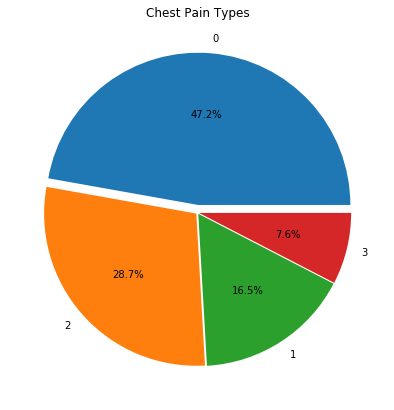

In [6]:
labels_cp = df.cp.value_counts().index
values_cp = df.cp.value_counts().values
explode = [0.05,0.01,0.01,0.01]
plt.figure(figsize = (7,7))
plt.pie(values_cp, explode = explode, labels = labels_cp, autopct = '%1.1f%%')
plt.title("Chest Pain Types")
plt.show()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64


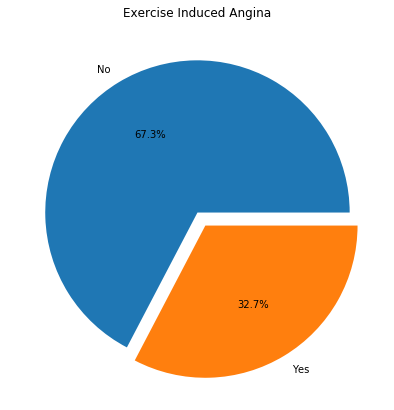

In [7]:
labels_exang = df.exang.value_counts().index
labels_exang = ['No','Yes']
values_exang = df.exang.value_counts().values
print(df.exang.describe())
explode = [0,0.1]
plt.figure(figsize = (7,7))
plt.pie(values_exang, explode = explode, labels = labels_exang, autopct = '%1.1f%%')
plt.title("Exercise Induced Angina")
plt.show()

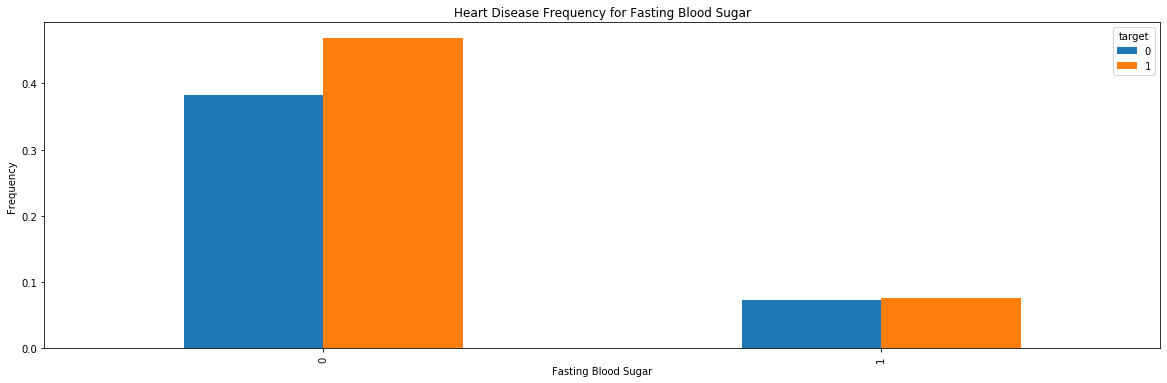

In [8]:
pd.crosstab(df.fbs,df.target,normalize=True).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.show()

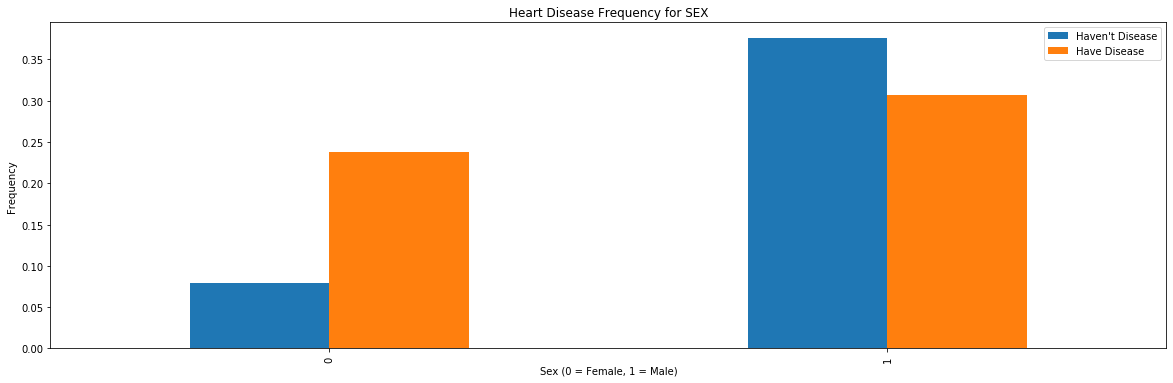

In [9]:
pd.crosstab(df.sex,df.target,normalize=True).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for SEX')
plt.xlabel('Sex (0 = Female, 1 = Male)' )
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

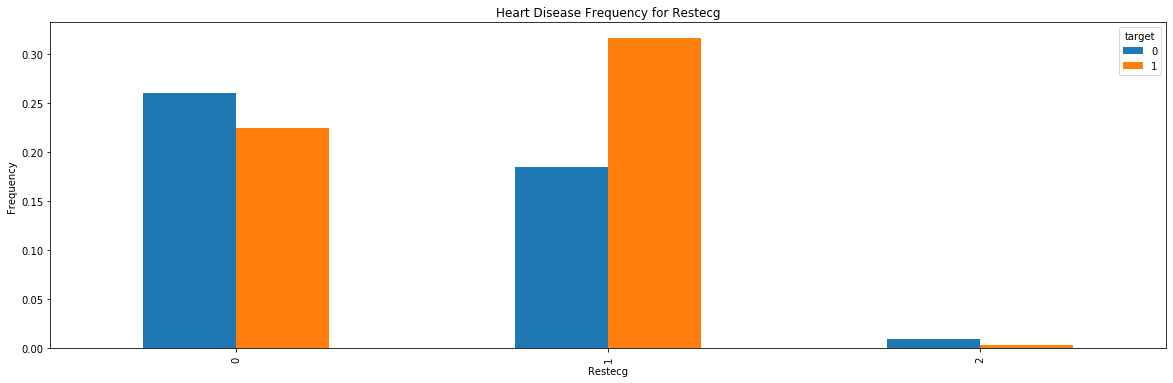

In [23]:
pd.crosstab(df.restecg,df.target,normalize=True).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Restecg')
plt.xlabel('Restecg')
plt.ylabel('Frequency')
plt.show()

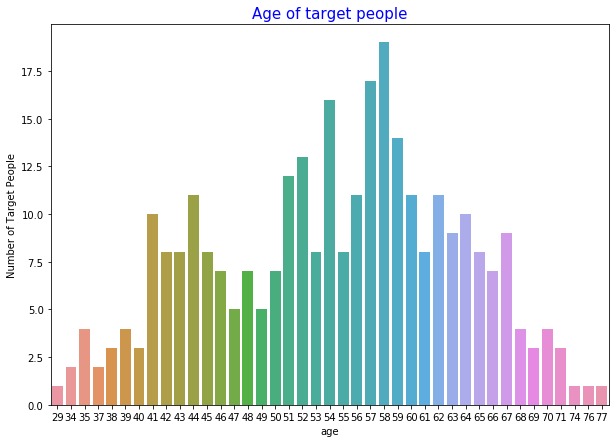

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['age'].index,y=df['target'].values)
plt.xlabel('Ages')
sns.countplot(x=df.age)
plt.ylabel('Number of Target People')
plt.title('Age of target people',color = 'blue',fontsize=15)
plt.show()

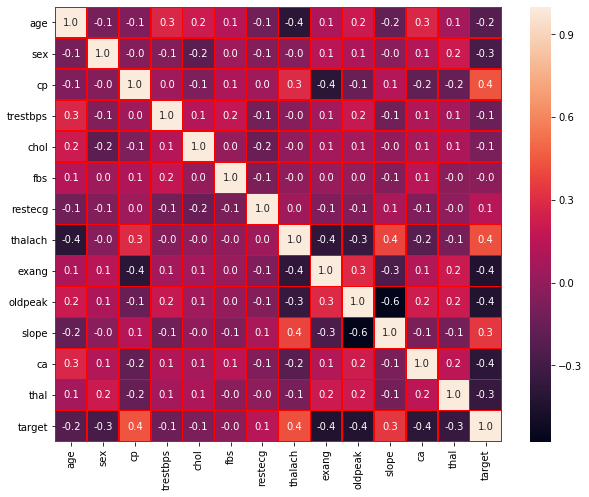

In [10]:
#Correlation matrix for dataset
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df = df[features]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

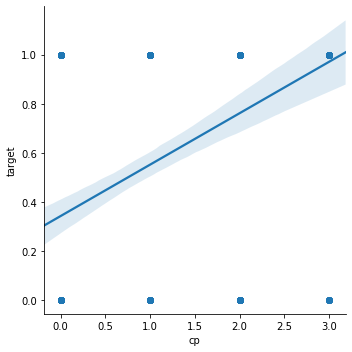

In [11]:
sns.lmplot(x="cp", y="target",data=df)
plt.show()

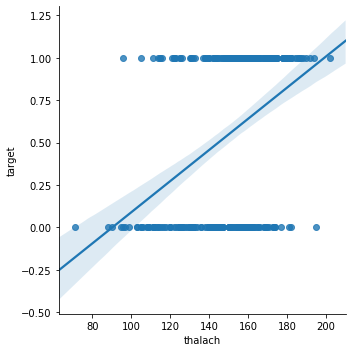

In [12]:
sns.lmplot(x="thalach", y="target",data=df)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','slope']
target = ['target']
x = df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

C:\Users\devendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


train accuracy: 0.768595041322314
test accuracy: 0.7213114754098361



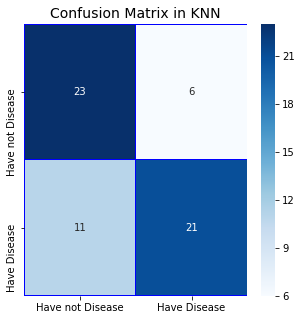

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , f1_score,roc_auc_score,accuracy_score,roc_curve
knnclassifier=KNeighborsClassifier(n_neighbors=6,algorithm='auto',leaf_size=30,metric='manhattan')
knnclassifier.fit(x_train, y_train)
trainaccuracy=knnclassifier.score(x_train, y_train)
testaccuracy=knnclassifier.score(x_test, y_test)
knnprediction=knnclassifier.predict(x_test)
print('train accuracy: {}\ntest accuracy: {}\n'.format(trainaccuracy,testaccuracy))
cmknn=confusion_matrix(y_test, knnprediction, labels=None, sample_weight=None)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmknn, fmt="d",
            xticklabels=['Have not Disease', 'Have Disease'],
            yticklabels=['Have not Disease', 'Have Disease'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Blue", cmap="Blues")
plt.title('Confusion Matrix in KNN', fontsize=14)
plt.show()

C:\Users\devendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


print accuracy of svm algo:  0.8524590163934426


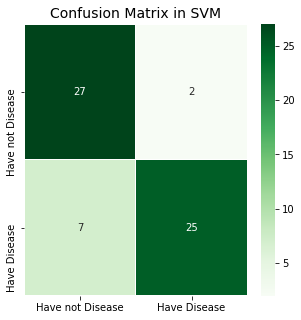

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state = 0, tol=0.001, shrinking=True, probability=True,C=1.0)
svm.fit(x_train,y_train)
svmprediction = svm.predict(x_test)
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

cmsvm=confusion_matrix(y_test, svmprediction, labels=None, sample_weight=None)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmsvm, fmt="d",
            xticklabels=['Have not Disease', 'Have Disease'],
            yticklabels=['Have not Disease', 'Have Disease'],
            annot=True,ax=ax1,
            linewidths=.2, cmap="Greens")
plt.title('Confusion Matrix in SVM', fontsize=14)
plt.show()

C:\Users\devendra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


print accuracy of svm algo using rbf:  0.5081967213114754


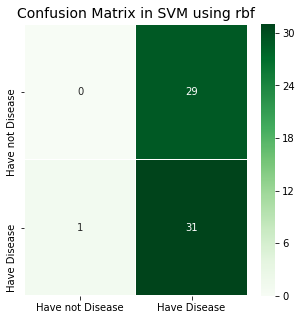

In [32]:
svm_rbf = SVC(kernel='rbf',random_state = 0, tol=0.001, shrinking=True, probability=True,C=1.0, gamma='auto')
svm_rbf.fit(x_train,y_train)
svmprediction = svm_rbf.predict(x_test)
print("print accuracy of svm algo using rbf: ",svm_rbf.score(x_test,y_test))

cmsvm_rbf=confusion_matrix(y_test, svmprediction, labels=None, sample_weight=None)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmsvm_rbf, fmt="d",
            xticklabels=['Have not Disease', 'Have Disease'],
            yticklabels=['Have not Disease', 'Have Disease'],
            annot=True,ax=ax1,
            linewidths=.2, cmap="Greens")
plt.title('Confusion Matrix in SVM using rbf', fontsize=14)
plt.show()

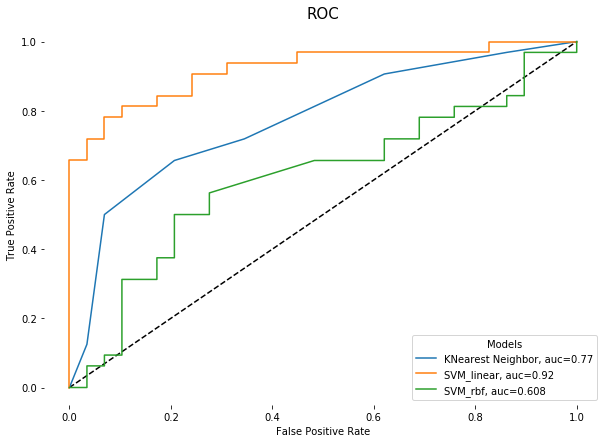

In [33]:
y_pred_proba_KNN = knnclassifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_KNN)
auc = roc_auc_score(y_test, y_pred_proba_KNN)

y_pred_proba_SVM = svm.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba_SVM)
auc2 = roc_auc_score(y_test, y_pred_proba_SVM)

y_pred_proba_SVM_rbf = svm_rbf.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba_SVM_rbf)
auc3 = roc_auc_score(y_test, y_pred_proba_SVM_rbf)

plt.figure(figsize=(10,7))
plt.title('ROC', size=15)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="KNearest Neighbor, auc="+str(round(auc,2)))
plt.plot(fpr2,tpr2,label="SVM_linear, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="SVM_rbf, auc=" +str(round(auc3,3)))
plt.legend(loc='best', title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.box(False)
plt.show()